### Inverse gazetteer matching

$ P(steve=name) = \theta $ is given

$ n $ = the number of times Steve happens in the corpus

$ P(steve \not\in G) = (1 - \theta) ^ n $ 

$ P(steve \in G) = 1 - P(steve \not\in G) $

$ P(\theta | steve \in G) = \frac{\theta}{P(steve \in G)} $

Expected Steve count:

$ E[steve] = \theta n $

In [2]:
sentence = ['Steve', 'is', 'a', 'guitarist', '.', 'Steve', 'has', 'a', 'band', '.']
gazetteer = ['Steve']

n_steves = 2
p_steve_is_name = 0.6
p_steve_is_not_in_gazetteer = (1 - p_steve_is_name) ** n_steves
p_steve_is_in_gazetteer = 1 - p_steve_is_not_in_gazetteer
p_steve_is_name_given_steve_in_gazetter = p_steve_is_name / p_steve_is_in_gazetteer
expected_num_steves = p_steve_is_name * n_steves

print('P(steve is name):', p_steve_is_name)
print('P(steve is not in gazetteer):', p_steve_is_not_in_gazetteer)
print('P(steve is in gazetteer):', p_steve_is_in_gazetteer)
print('P(steve is name | steve is in gazetter):', p_steve_is_name_given_steve_in_gazetter)
print('E[num steves = name]:', expected_num_steves)

P(steve is name): 0.6
P(steve is not in gazetteer): 0.16000000000000003
P(steve is in gazetteer): 0.84
P(steve is name | steve is in gazetter): 0.7142857142857143
E[num steves = name]: 1.2


### Steve with prior knowledge

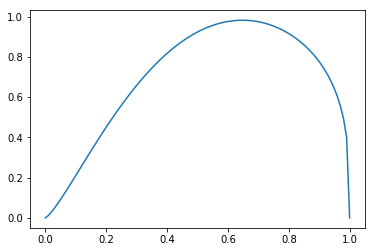

In [6]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    return 1 if n <= 1 else factorial(n - 1) * n

def gamma_fn(x):
    return factorial(x-1)
    
def beta_fn(x, y):
    return (gamma_fn(x) * gamma_fn(y)) / gamma_fn(x+y) 
    
def binomial_coefficient(n, k):
    return factorial(n) / (factorial(k) * factorial(n-k))

alpha = 1.3
beta = 1.3
n_steves = 3
def steve_prior(x):
    r = x ** (alpha-1) * (1-x) ** (beta-1)
    return r / beta_fn(alpha, beta)

def steve_likelihood(p_steve_is_name):                                   
    p_steve_is_not_in_gazetteer = (1 - p_steve_is_name) ** n_steves
    p_steve_is_in_gazetteer = 1 - p_steve_is_not_in_gazetteer
    return p_steve_is_in_gazetteer
    
def steve_total(x):
    return steve_prior(x) * steve_likelihood(x)
                                   
x = np.linspace(0, 1, num=101)
y = list(map(steve_total, x))
plt.plot(x, y)

### Variable number of mentions in gazetteer

In [7]:
n = 20
num_contexts = 3

def binomial_steve(theta, n, k):
    return binomial_coefficient(n, k) * theta ** k * (1-theta) ** (n-k)

def cumulative_steve(theta, n, k):
    r = 0
    for i in range(k+1):
        r += binomial_steve(theta, n, i)
    return r
    
p_steve_is_name = 0.2
p_steve_is_not_in_gazetteer = (1 - p_steve_is_name) ** n
p_steve_is_in_gazetteer = 1 - p_steve_is_not_in_gazetteer
p_steve_is_name_given_steve_in_gazetter = p_steve_is_name / p_steve_is_in_gazetteer

print('n:', n)
print('P(steve is name):', p_steve_is_name)
print('P(steve is not in gazetteer):', p_steve_is_not_in_gazetteer)
print('P(steve is in gazetteer):', p_steve_is_in_gazetteer)
print('P(steve is name | steve is in gazetter):', p_steve_is_name_given_steve_in_gazetter) 

steve_counts = [binomial_steve(p_steve_is_name, n, i) for i in range(6)]
steve_cums   = [cumulative_steve(p_steve_is_name, n, i) for i in range(6)]

print()
for i in range(6):
    print('P(steve is name ' + str(i) + 'x):', steve_counts[i])
    
print()
for i in range(6):    
    print('P(steve is name at most ' + str(i) + 'x):', steve_cums[i])

p_steve_is_in_gazetter_x_times = [0] + [1 - steve_cums[i-1] for i in range(1, 6)]    
    
print()
for i in range(1, 6):    
    print('P(steve is in gazetteer ' + str(i) + 'x):', p_steve_is_in_gazetter_x_times[i])
    
print()    
for i in range(1, 6):    
    num_times_in_gazetteer = i
    k = num_times_in_gazetteer
    
    p_steve_is_at_most_k_minus_one = cumulative_steve(p_steve_is_name, n-1, k-2)
    p_steve_is_at_least_k = 1 - p_steve_is_at_most_k_minus_one

    p_t = (p_steve_is_at_least_k * p_steve_is_name) / p_steve_is_in_gazetter_x_times[i]
    print('P(steve is name | steve in gazetteer ' + str(i) + 'x):', p_t)

n: 20
P(steve is name): 0.2
P(steve is not in gazetteer): 0.011529215046068483
P(steve is in gazetteer): 0.9884707849539315
P(steve is name | steve is in gazetter): 0.20233273764314763

P(steve is name 0x): 0.011529215046068483
P(steve is name 1x): 0.05764607523034241
P(steve is name 2x): 0.13690942867206324
P(steve is name 3x): 0.20536414300809488
P(steve is name 4x): 0.21819940194610077
P(steve is name 5x): 0.17455952155688062

P(steve is name at most 0x): 0.011529215046068483
P(steve is name at most 1x): 0.0691752902764109
P(steve is name at most 2x): 0.20608471894847413
P(steve is name at most 3x): 0.41144886195656905
P(steve is name at most 4x): 0.6296482639026698
P(steve is name at most 5x): 0.8042077854595504

P(steve is in gazetteer 1x): 0.9884707849539315
P(steve is in gazetteer 2x): 0.9308247097235891
P(steve is in gazetteer 3x): 0.7939152810515259
P(steve is in gazetteer 4x): 0.588551138043431
P(steve is in gazetteer 5x): 0.3703517360973302

P(steve is name | steve in gazett

### Multiple contexts

In [8]:
n = 3
c = 2

p_steve_is_name 

def multinomial(x):
    n_ = np.sum(x)
    thetas = [1 / (c+1)] * (c+1)
    r = factorial(n_) / np.product(list(map(factorial, x)))
    return r * np.product(np.power(thetas, x))

x1 = multinomial([1,1,1])
x2 = multinomial([0,2,1])
p_two_contexts = x1 + x2*2


print(p_two_contexts)



0.444444444444


### Generative Network

$ P(steve=name) = \theta $

$ steve_G = $ number of Steves in gazetteer

$ P(steve_G|\theta) $ is a binomial distribution.

$ P(\theta) $ is a theta distribution.

$ \theta = argmax_\theta P(steve_G|\theta) P(\theta) $

In [9]:
sentence_g = 'dave adams, dave johnson and dave smith are men that went to the first '

sentence = 'steve irwin is a man and steve smith was also a man but dave remains skeptical'

gazetteer = {
    'dave': (3, 1),
    'irwin': (1, 1),
    'smith': (3, 1),    
    'steve': (2, 2),
    'and': (1, 500),    
}

results = {
    'dave':  [0, 0],
    'irwin': [0, 0],
    'smith': [0, 0],    
    'steve': [0, 0],
    'and':   [0, 0],    
}

def binomial_distribution(k, n, theta):
    return binomial_coefficient(n,k) * theta ** k * (1-theta) ** (n-k)

def beta_distribution(theta, alpha, beta):
    r = theta ** (alpha-1) * (1-theta) ** (beta-1)
    return r / beta_fn(alpha, beta)

def map_est(k, n, alpha, beta):
    return (k + alpha - 1) / (n + alpha + beta - 2)

def tkn_theta(tkn):
    a, b = gazetteer[tkn]
    k, n = results[tkn]        
    return map_est(k, n, a+1, b+1)    

def print_estimates():
    global results, gazetteer
    for key in gazetteer:
        a, b = gazetteer[key]
        k, n = results[key]        
        x = map_est(k, n, a+1, b+1)    
        print(key, x)
    print()

def update_results(nresults):
    for key in results:
        results[key][0] = 0.7 * results[key][0] + 0.3 * nresults[key][0] 
        results[key][1] = 0.7 * results[key][1] + 0.3 * nresults[key][1]
    
print_estimates()
    
sentence = sentence.split()
for n in range(1000):
    nresults = {
        'dave':  [0, 0],
        'irwin': [0, 0],
        'smith': [0, 0],    
        'steve': [0, 0],
        'and':   [0, 0],            
    }
    
    for t in sentence:
        if not t in gazetteer:
            continue

        p = tkn_theta(t)
        y = np.random.choice(a=[0, 1], p=[1-p, p])
        if y == 1:
            nresults[t][0] += 1
        nresults[t][1] += 1
        
    update_results(nresults)
    
print(results)
print_estimates()

dave 0.75
irwin 0.5
smith 0.75
steve 0.5
and 0.001996007984031936

{'dave': [0.6279203978150306, 0.9999999999999996], 'irwin': [0.24122233873333326, 0.9999999999999996], 'smith': [0.9860605168336936, 0.9999999999999996], 'steve': [1.3060896811173293, 1.9999999999999991], 'and': [3.626390270716399e-68, 0.9999999999999996]}
dave 0.7255840795630061
irwin 0.41374077957777783
smith 0.7972121033667386
steve 0.5510149468528883
and 0.00199203187250996



### Toy Example

In [10]:
import tensorflow as tf
import numpy as np
from itertools import groupby

gazetteer = [
    'john smith',
    'dave smith',
    'mary adams',
    'mary connor',
    'john wick',
    'john connor',
]

g_vocab = set([t for s in gazetteer for t in s.split()])

def get_priors():
    w = [t for g in gazetteer for t in g.split()]
    w.sort()
    f = {k: sum(1 for _ in g) for k, g in groupby(w)}
    n = sum([f[key] for key in f])
    
    big_n = 17
    f = {key:(f[key], round(big_n*f[key]/float(n))-f[key]) for key in f}  
    return f

def map_est(k, n, alpha, beta):
    return (k + alpha - 1) / (n + alpha + beta - 2)

sentences = [
    ['dave', 'smith', 'went', 'to', 'the', 'church', 'and', 'talked', 'mary', 'into', 'doing', 'it'],
    ['john', 'is', 'a', 'magnificent', 'scotsman', 'that', 'drinks', 'whisky', 'by', 'the', 'lot'],
    ['evan', 'connor', 'won', 'the', 'tennis', 'match', 'against', 'erick', 'smith']
]
actual_labels = [
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 1, 1]
]

vocab = list(set(t for s in sentences for t in s))
vocab_size = len(vocab)
embeddings_size = 15

priors = get_priors() 
for w in vocab:
    if not w in priors:
        priors[w] = (0, 3)

counts = {}
for p in priors:
    counts[p] = [0, 0]
    
def get_probs():
    probs = {}
    for p in priors:
        k, n = counts[p]
        alpha, beta = priors[p]
        probs[p] = map_est(k, n, 1+alpha, 1+beta)
    return probs

probs = get_probs()

def update_counts(new_counts):
    global counts
    for key in counts:
        counts[key] = [
            (4*counts[key][0] + new_counts[key][0]) / 5.0,
            new_counts[key][1]
        ]

def get_random_labels(sentence):
    labels = []
    for t in sentence:        
        p = probs[t]
        y = np.random.choice(a=[0, 1], p=[1-p, p])
        labels.append(y)  
    return labels

def get_labels_from_gazetteer(sentence):
    labels = []
    for t in sentence:
        labels.append(1 if t in g_vocab else 0)
    return labels

words = tf.placeholder(tf.string, shape=(None,), name='words')
label_ids = tf.placeholder(tf.int32, shape=(None,), name='label_ids')
train_label_ids = tf.placeholder(tf.int32, shape=(None,), name='train_label_ids')

labels = tf.one_hot(train_label_ids, 2)

mapping_vocab = tf.constant(vocab)
table = tf.contrib.lookup.index_table_from_tensor(mapping=mapping_vocab)
word_ids = table.lookup(words)

with tf.variable_scope('x', reuse=tf.AUTO_REUSE):
    v = tf.get_variable('embeddings', [vocab_size, embeddings_size], tf.float32)
    embeddings = tf.nn.embedding_lookup(v, word_ids)

    output = tf.layers.dense(embeddings, 10)
    logits = tf.layers.dense(output, 2)
    pred_ids = tf.argmax(logits, axis=-1)
    # pred_ids = 0*pred_ids
    correct = tf.equal(tf.to_int32(pred_ids), label_ids)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits))
    train_step = tf.train.AdamOptimizer().minimize(loss)

print(probs)
with tf.Session() as sess:
    tf.tables_initializer().run()
    tf.initializers.global_variables().run()
    
    for _ in range(1000):
        a = []
        
        new_counts = {}
        for p in priors:
            new_counts[p] = [0, 0]
        
        for i, s in enumerate(sentences):
            acc, preds, _ = sess.run([accuracy, pred_ids, train_step], feed_dict={
                words: [t for t in s],
                label_ids: actual_labels[i],
                # train_label_ids: get_labels_from_gazetteer(s)
                train_label_ids: get_random_labels(s)
            })
            a.append(acc)
            
            for j, p in enumerate(preds):
                if p == 1:
                    new_counts[s[j]][0] += 1
                new_counts[s[j]][1] += 1
        update_counts(new_counts)
        probs = get_probs()
            
        a = sum(a) / 3
        
    print('Baseline: 0.738215506077')
    print('Gazetteer: 0.925925930341')
    print(a)
    # print(new_counts)    
    # print(counts)
    print(probs)

{'adams': 1.0, 'connor': 0.6666666666666666, 'dave': 1.0, 'john': 0.75, 'mary': 0.6666666666666666, 'smith': 0.6666666666666666, 'wick': 1.0, 'it': 0.0, 'into': 0.0, 'and': 0.0, 'match': 0.0, 'the': 0.0, 'scotsman': 0.0, 'against': 0.0, 'talked': 0.0, 'to': 0.0, 'a': 0.0, 'church': 0.0, 'magnificent': 0.0, 'is': 0.0, 'lot': 0.0, 'evan': 0.0, 'drinks': 0.0, 'erick': 0.0, 'doing': 0.0, 'whisky': 0.0, 'tennis': 0.0, 'that': 0.0, 'went': 0.0, 'won': 0.0, 'by': 0.0}
Baseline: 0.738215506077
Gazetteer: 0.925925930341
0.925925930341
{'adams': 1.0, 'connor': 0.7499999999999999, 'dave': 0.9999999999999998, 'john': 0.8, 'mary': 0.7499999999999999, 'smith': 0.7999999999999998, 'wick': 1.0, 'it': 0.0, 'into': 0.0, 'and': 0.0, 'match': 0.0, 'the': 0.0, 'scotsman': 0.0, 'against': 0.0, 'talked': 0.0, 'to': 0.0, 'a': 0.0, 'church': 0.0, 'magnificent': 0.0, 'is': 0.0, 'lot': 0.0, 'evan': 0.0, 'drinks': 0.0, 'erick': 0.0, 'doing': 0.0, 'whisky': 0.0, 'tennis': 0.0, 'that': 0.0, 'went': 0.0, 'won': 0.0,

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def factorial(n):
    return 1 if n <= 1 else factorial(n - 1) * n

def gamma_fn(x):
    return factorial(x-1)
    
def beta_fn(x, y):
    return (gamma_fn(x) * gamma_fn(y)) / gamma_fn(x+y) 
    
def binomial_coefficient(n, k):
    return factorial(n) / (factorial(k) * factorial(n-k))

alpha = 1.3
beta = 1.3
n_steves = 3
def steve_prior(x):
    r = x ** (alpha-1) * (1-x) ** (beta-1)
    return r / beta_fn(alpha, beta)

def steve_likelihood(p_steve_is_name):                                   
    p_steve_is_not_in_gazetteer = (1 - p_steve_is_name) ** n_steves
    p_steve_is_in_gazetteer = 1 - p_steve_is_not_in_gazetteer
    return p_steve_is_in_gazetteer
    
def steve_total(x):
    return steve_prior(x) * steve_likelihood(x)
                                   
x = np.linspace(0, 1, num=101)
y = list(map(steve_total, x))
plt.plot(x, y)

### Entropy

$ H = - \sum_{i=1}^N p(x_i) \cdot log p(x_i) $

In [41]:
import numpy as np

# There is a distribution with 5 possible values. P is the probability of each value.

P1 = np.array([0.25, 0.25, 0.25, 0.25]) # Should have big entropy.
P2 = np.array([0.05, 0.05, 0.2 , 0.7 ]) # Should have average entropy. 
P3 = np.array([0.01, 0.01, 0.01, 0.96]) # Should have small entropy.
P4 = np.array([0.26, 0.26, 0.26, 0.22])

def entropy(P):
    return -np.sum(P * np.log2(P))

def kl_divergence(P, Q):
    return np.sum(P * np.log2(P/Q))

print(entropy(P1))
print(entropy(P2))
print(entropy(P3))

print(kl_divergence(P2,P1))

2.0
1.25677964945
0.255853627185
0.743220350553
2.0000000000030003
